###  Plot the training data

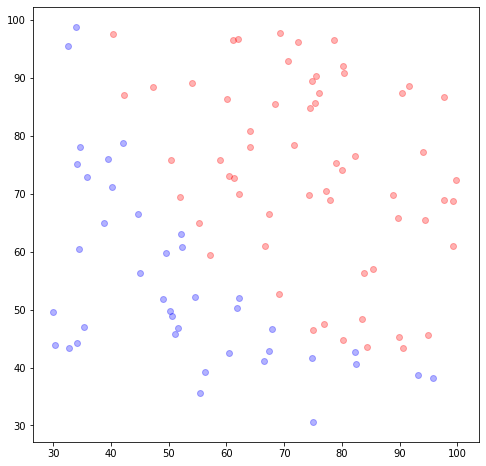

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: x, Length: 100, dtype: float64

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data    =  pd.read_csv('data.txt',sep=',',engine='python',encoding='cp949',names=['x','y','label'])

X   = data['x']
Y   = data['y']
LABEL  = data['label']

x_label0    = data.loc[data['label'] == 0,'x']
x_label1    = data.loc[data['label']==1,'x']


y_label0    = data.loc[data['label']==0,'y']
y_label1    = data.loc[data['label']==1,'y']


plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


In [163]:
x_n = (x-x.mean()) / x.std()
y_n = (y-y.mean()) / y.std()

##### make matrix

In [217]:
#train data matrix
t_matrix = np.c_[np.ones(x.shape[0]),x_n,y_n]
label

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [292]:
alpha = 1
iteration = 5000
m = label.size
#theta 랜덤 생성
np.random.seed(777)
theta = np.random.rand(3)
theta

array([0.15266373, 0.30235661, 0.06203641])

### Objective Function

1.cost function 만들기

In [293]:
#make sigmoid function
m = label.size

def cost(label,hx):
    j = np.mean(((-label*np.log(hx))-((1-label)*np.log(1-hx))))
    return j


In [294]:
def gradient_descent(matrix,label,theta,iterations,alpha):
    cost_history=[]
    theta_history=[theta]
    for i in range(iterations):
        prediction = np.dot(matrix,theta)
        sig = 1/(1+np.exp(-prediction))
        error = sig - label
        cost_history.append(cost(label,sig))
        theta = theta - (alpha*(1/m)*np.dot(matrix.T,error))
        theta_history.append(theta)
    return theta_history, cost_history


In [295]:
theta_history,cost_history = gradient_descent(t_matrix,label,theta,iteration,alpha)

## Plot the estimated parameters

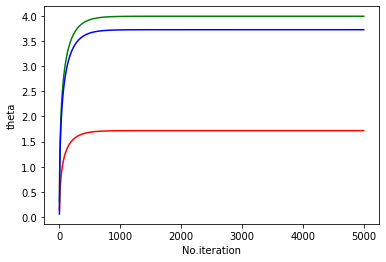

In [296]:

theta0 =[]
theta1 =[]
theta2 =[]
for i in range(iteration):
    theta0.append(theta_history[i][0])
    theta1.append(theta_history[i][1])
    theta2.append(theta_history[i][2])

plt.ylabel('theta')
plt.xlabel('No.iteration')
plt.plot(theta0,c='r')
plt.plot(theta1,c='g')
plt.plot(theta2,c='b')
plt.show()

### Plot the training error

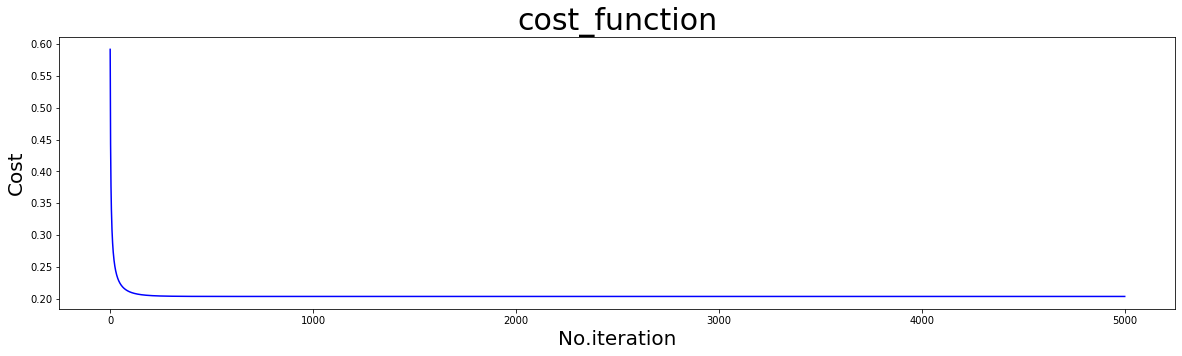

In [298]:
plt.figure(figsize=(20, 5))
plt.title('cost_function',size = 30)
plt.ylabel('Cost',size = 20)
plt.xlabel('No.iteration',size = 20)
plt.plot(cost_history,c='b')
plt.show()

## Plot the obtained classifier

In [327]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

## Plot the obtained classifier

In [463]:
data.head()
from matplotlib.colors import ListedColormap
def plot_decision(X,y,classifier,resolution=0.5):
    markers = ('o','s')
    colors = ('blue','red')
    cmap = ListedColormap(colors,name='jet')
    
    x1_min,x1_max = 30,100
    x2_min,x2_max = 30,100
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.8,cmap='jet')
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
            alpha = 1 , c=cmap(idx), marker=markers[idx],label =cl)


In [464]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


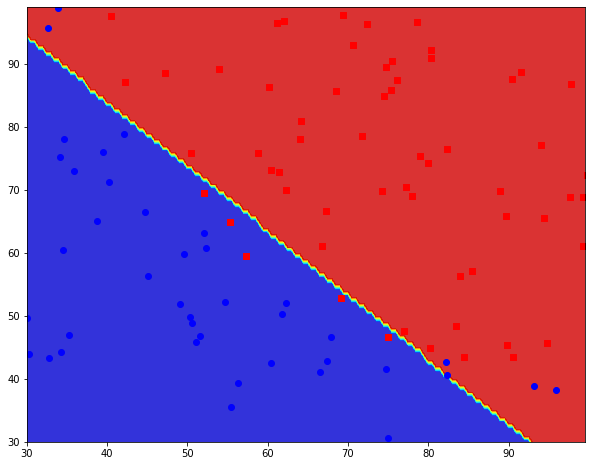

In [465]:
train_matrix = np.c_[X,Y]
pca = PCA(n_components=2)
lr =LogisticRegression()
X_train_pca = pca.fit_transform(train_matrix)
lr.fit(train_matrix,label)
plot_decision(train_matrix,label,classifier=lr)